In [1]:
!pip install seaborn matplotlib

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Gaussian Process regression

In [3]:
# define RBF kernel
# Define the kernel
def kernel(a, b):
    sqdist = np.sum(a**2,axis=1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    # np.sum( ,axis=1) means adding all elements columnly; .reshap(-1, 1) add one dimension to make (n,) become (n,1)
    return np.exp(-.5 * sqdist)

In [4]:
n = 200  
m = 10
Xshow = np.linspace(0, 1, n).reshape(-1,1)

In [5]:
K_ = kernel(Xshow,Xshow)

In [6]:
f_prior = np.random.multivariate_normal(np.zeros(n), K_, m).T

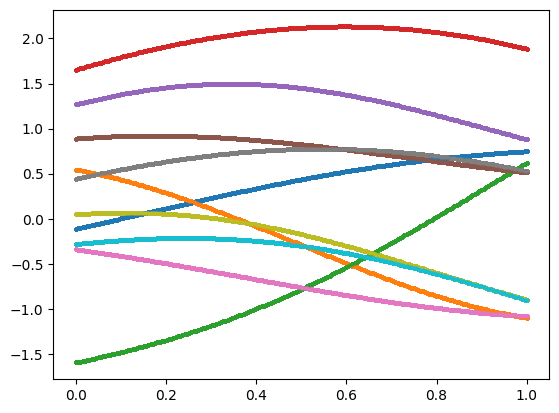

In [7]:
for i in range(m):
    plt.plot(Xshow, f_prior, '-o', linewidth=1, markersize=2, markeredgewidth=1)
plt.show()

In [8]:
# LL^T = K
# L = cholesky(K)
# K^-1 = L^{-T} L^{-1}

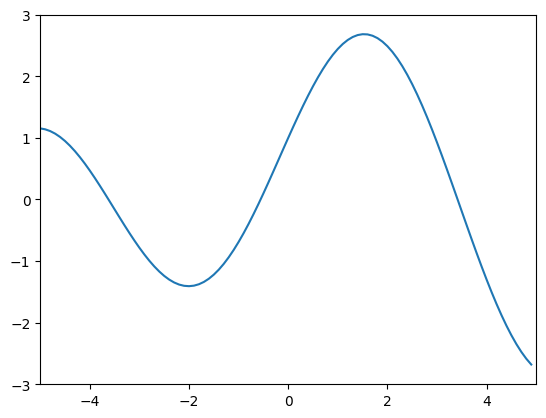

In [138]:
# This is the true unknown function we are trying to approximate
f = lambda x: (2. * np.sin(0.9*x) + np.cos(0.5*x)).flatten()# + 2.0
#f = lambda x: (0.25*(x**2)).flatten()
x = np.arange(-5, 5, 0.1)

plt.plot(x, f(x))
plt.axis([-5, 5, -3, 3])
plt.show()

In [139]:
def kernel(a, b, l=0.5, sigma=1.0):
    if l is None:
        l = 0.5
    if sigma is None:
        sigma = 1.0
    kernelParameter_l = l
    kernelParameter_sigma = sigma
    sqdist = np.sum(a**2,axis=1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    # np.sum( ,axis=1) means adding all elements columnly; .reshap(-1, 1) add one dimension to make (n,) become (n,1)
    return kernelParameter_sigma*np.exp(-.5 * (1/kernelParameter_l) * sqdist)

In [140]:
N = 100        # number of existing observation points (training points).
n = 200        # number of test points.
s = 0.01    # noise variance.

In [141]:
X = np.random.uniform(-50, 50, size=(N,1))     # N training points 
y = f(X) + s*np.random.randn(N)

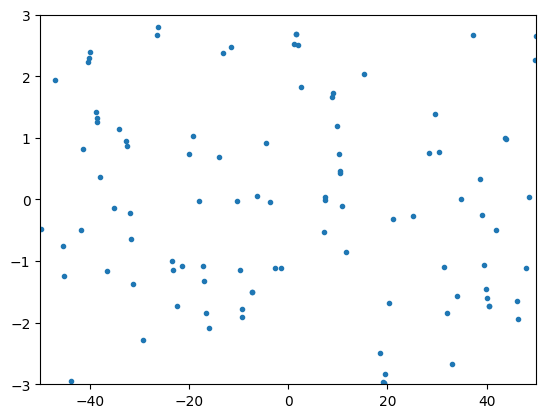

In [142]:
plt.plot(X, y,'.')
plt.axis([-50, 50, -3, 3])
plt.show()

In [143]:
l_opt, sigma_f_opt =None, None

K = kernel(X, X, l=l_opt, sigma=sigma_f_opt)
L = np.linalg.cholesky(K + s*np.eye(N))

In [144]:
Xtest = np.linspace(-50, 50, n).reshape(-1,1)

In [145]:
# alpha = L^-T L^-1 y
# f*_mean = k(X,Xtest)^T alpha
Linv= np.linalg.inv(L)
alpha = Linv.T @ Linv @ y
# alpha = np.linalg.inv(K) @ y
pred_mean = kernel(X, Xtest, l=l_opt, sigma=sigma_f_opt).T @ alpha

v = Linv @ kernel(X, Xtest, l=l_opt, sigma=sigma_f_opt)
pred_var = kernel(Xtest, Xtest, l=l_opt, sigma=sigma_f_opt) - v.T @ v

In [146]:
pred_std = np.sqrt(np.diag(pred_var))

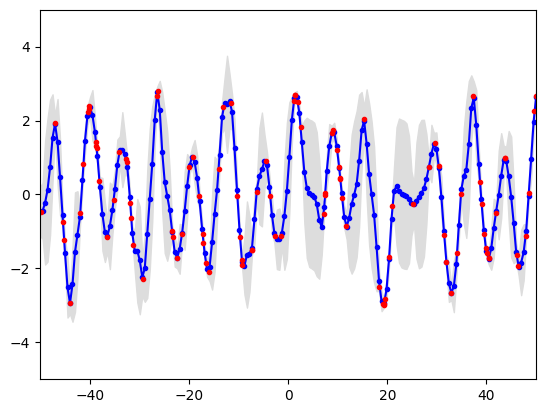

In [147]:
plt.plot(Xtest, pred_mean,'.-b')
plt.plot(X, y,'.r')
plt.gca().fill_between(Xtest.flat, pred_mean-2*pred_std, pred_mean+2*pred_std, color="#dddddd")
plt.axis([-50, 50, -5, 5])
plt.show()

In [91]:
pred_var[:3,:3]

array([[ 0.00773137, -0.00096428,  0.00126024],
       [-0.00096428,  0.00312135,  0.00185605],
       [ 0.00126024,  0.00185605,  0.01441258]])

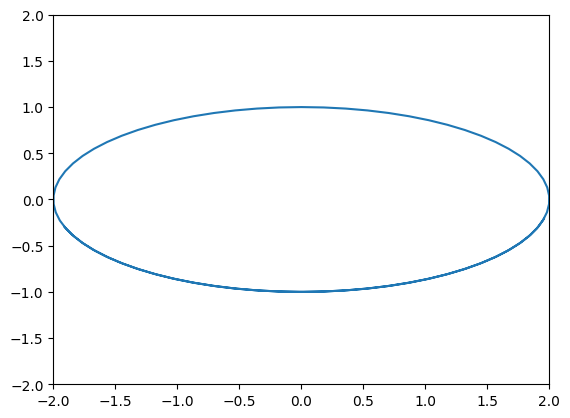

In [38]:
# let's try a 2d example
# This is the true unknown function we are trying to approximate
f = lambda x: 2. * np.sin(0.9*x).flatten()
g = lambda x: np.cos(0.9*x).flatten()
#f = lambda x: (0.25*(x**2)).flatten()
t = np.arange(-5, 5, 0.1)

plt.plot(f(t), g(t))
plt.axis([-2, 2, -2, 2])
plt.show()

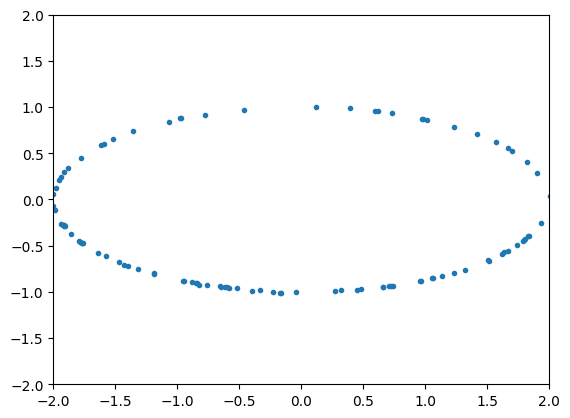

In [39]:
T = np.random.uniform(-5, 5, size=(N,1))     # N training points 
x = f(T) + s*np.random.randn(N)
y = g(T) + s*np.random.randn(N)

plt.plot(x, y,'.')
plt.axis([-2, 2, -2, 2])
plt.show()

In [40]:
K = kernel(T, T)
L = np.linalg.cholesky(K + s*np.eye(N))

In [41]:
Ttest = np.linspace(-5, 5, n).reshape(-1,1)

In [42]:
Linv= np.linalg.inv(L)
alphax = Linv.T @ Linv @ x
alphay = Linv.T @ Linv @ y
# alpha = np.linalg.inv(K) @ y
pred_meanx = kernel(T, Ttest).T @ alphax
pred_meany = kernel(T, Ttest).T @ alphay

v = Linv @ kernel(T, Ttest)
pred_var = kernel(Ttest, Ttest) - v.T @ v
pred_std = np.sqrt(np.diag(pred_var))

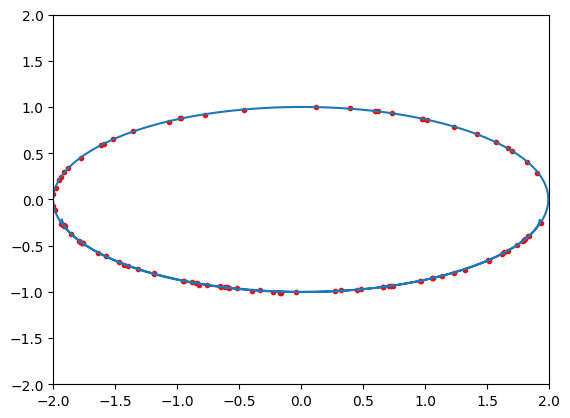

In [43]:
plt.plot(x, y,'.r')
plt.plot(pred_meanx, pred_meany)
#plt.gca().fill_between(Xtest.flat, pred_mean-2*pred_std, pred_mean+2*pred_std, color="#dddddd")
plt.axis([-2, 2, -2, 2])
plt.show()

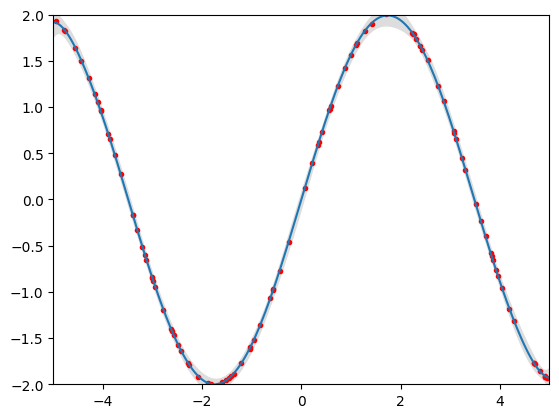

In [44]:
plt.plot(T, x,'.r')
plt.plot(Ttest, pred_meanx)
plt.gca().fill_between(Ttest.flat, pred_meanx-2*pred_std, pred_meanx+2*pred_std, color="#dddddd")
plt.axis([-5, 5, -2, 2])
plt.show()

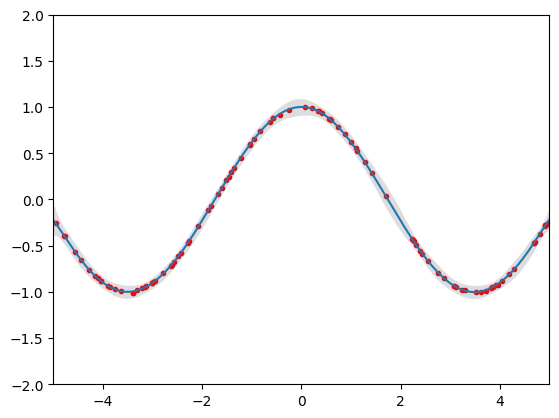

In [45]:
plt.plot(T, y,'.r')
plt.plot(Ttest, pred_meany)
plt.gca().fill_between(Ttest.flat, pred_meany-2*pred_std, pred_meany+2*pred_std, color="#dddddd")
plt.axis([-5, 5, -2, 2])
plt.show()

In [46]:
np.linalg.det(K)

-0.0

In [47]:
sum(np.log(np.diag(L)))

-211.77119239356725

In [48]:
from scipy.optimize import minimize
from random import shuffle
from itertools import cycle
# -log liklihood
def nll_fn(X_train, Y_train, noise):
    def step(theta):
        K = kernel(X_train, X_train, l=theta[0], sigma=theta[1]) + \
            noise**2 * np.eye(len(X_train))
        return np.sum(np.log(np.diagonal(np.linalg.cholesky(K)))) + \
               0.5 * Y_train.T @ np.linalg.inv(K) @ Y_train + \
               0.5 * len(X_train) * np.log(2*np.pi)
    return step

def nll_fn2(X_train, Y_train, noise):
    idx = np.arange(0, len(X_train))
    shuffle(idx)
    X_train = X_train[idx]
    Y_train = Y_train[idx]
    bs = 16
    chunks = len(X_train) // bs
    X = cycle(iter(np.array_split(X_train,chunks)))
    Y = cycle(iter(np.array_split(Y_train,chunks)))
    def step(theta):
        _X_train = next(X)
        _Y_train = next(Y)
        
        K = kernel(_X_train, _X_train, l=theta[0], sigma=theta[1]) + \
            noise**2 * np.eye(len(_X_train))
        K1 = kernel(_X_train, _X_train, l=theta[0], sigma=theta[1]) + \
            noise**2 * np.eye(len(_X_train))
        return (np.sum(np.log(np.diagonal(np.linalg.cholesky(K)))) + \
               0.5 * _Y_train.T @ np.linalg.inv(K) @ _Y_train + \
               0.5 * len(_X_train) * np.log(2*np.pi))/len(_X_train)
        
    return step

In [49]:
res = minimize(nll_fn(X, y, s), [1, 1], 
               bounds=((1e-5, None), (1e-5, None)),
               method='L-BFGS-B')

In [428]:
res = minimize(nll_fn2(X, y, s), [1, 1], 
               bounds=((1e-5, None), (1e-5, None)),
               method='Nelder-Mead')

In [50]:
l_opt, sigma_f_opt = res.x
print(l_opt, sigma_f_opt)

1e-05 3.2986152616976536
